In [1]:
import tensorflow as tf
import os
from keras.backend.tensorflow_backend import set_session
os.environ["CUDA_VISIBLE_DEVICES"]="1"
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

/root/miniconda3/envs/tensorflow35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from Model.DCVAE import DCVAE
from Model.Utils import LoadMPS45,PlotHistory,PlotDataAE
from keras.utils import to_categorical
from keras.optimizers import RMSprop,Adam
import numpy as np

In [3]:
x_train1,x_test1=LoadMPS45(dirBase='DataSet/MPS-45.mat');
x_train=to_categorical(x_train1,2)
x_test=to_categorical(x_test1,2)

In [4]:
model = DCVAE(input_shape=(45, 45, 2),filters=[32,32,16],strides=[2,2,1],hidden_dim=1024,
               latent_cont_dim=600,opt=RMSprop(lr=0.001),dropout=0.1)

In [5]:
model.fit(x_train, num_epochs=1000,batch_size=256,val_split=0.2,verbose=0)

Setting up model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 45, 45, 2)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 45, 45, 2)    18          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 23, 23, 32)   288         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 12, 12, 32)   9248        conv2d_2[0][0]                   
_________________________________________________________________________________________


Epoch 00072: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.



Epoch 00124: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.



Epoch 00133: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.



Epoch 00141: ReduceLROnPlateau reducing learning rate to 5e-07.


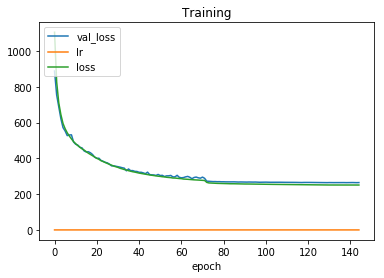

In [6]:
PlotHistory(model.history.history)

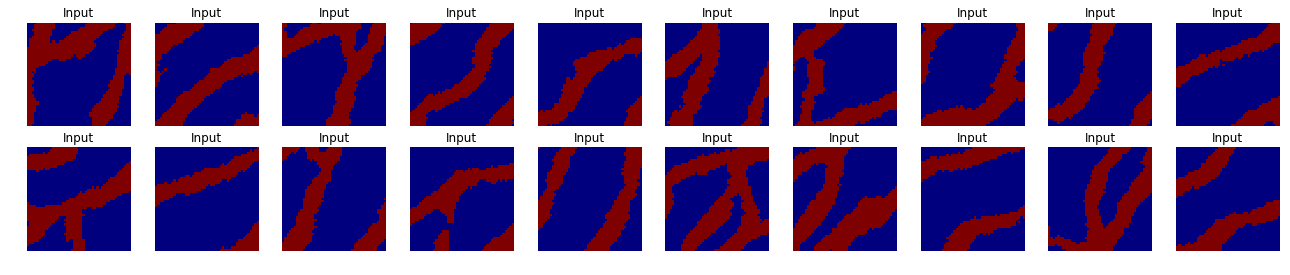

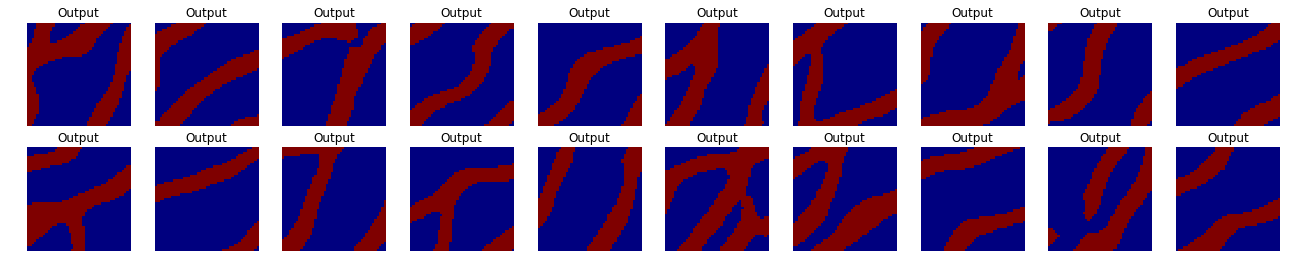

In [7]:
x_rec=model.model.predict(x_test)
PlotDataAE(x_test[:,:,:,1],np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=45)

<Figure size 1620x1620 with 0 Axes>

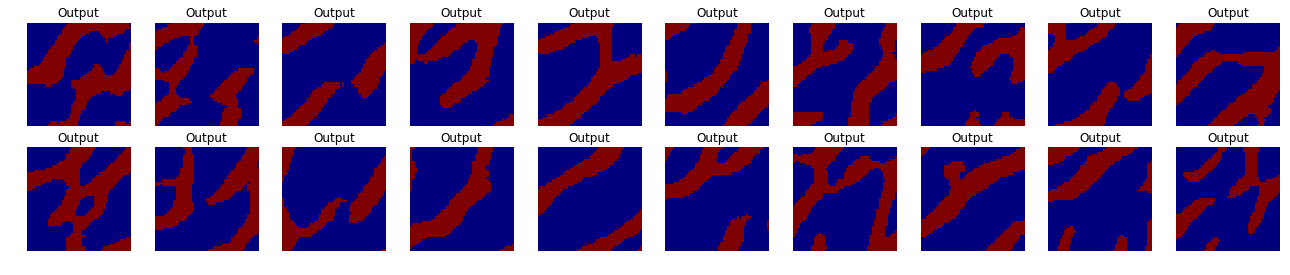

In [8]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],digit_size=45,Only_Result=False)